In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from CBFV import composition

In [8]:
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

In [9]:
RNG_SEED = 8
np.random.seed(RNG_SEED)
curr_dir = os.getcwd()
DATA_PATH = os.path.join(os.path.dirname(curr_dir), 'Data')
RESULTS_PATH = os.path.join(os.path.dirname(curr_dir), 'Results')

In [10]:
df_train = pd.read_csv(os.path.join(DATA_PATH, "intermetallics_train7.csv"))
df_val = pd.read_csv(os.path.join(DATA_PATH, "intermetallics_val7.csv"))
df_test = pd.read_csv(os.path.join(DATA_PATH, "intermetallics_test7.csv"))

In [ ]:
df_train = df_train.drop_duplicates()
df_val = df_val.drop_duplicates()
df_test = df_test.drop_duplicates()

In [11]:
drop_columns = ['composition', 'material_id', 'structure',
                'total_magnetization', 'total_magnetization_normalized_vol']
df_train.drop(
    columns=[col for col in drop_columns if col in df_train.columns], inplace=True)
df_val.drop(
    columns=[col for col in drop_columns if col in df_val.columns], inplace=True)
df_test.drop(
    columns=[col for col in drop_columns if col in df_test.columns], inplace=True)

df_train.rename(columns={'total_magnetization_normalized_formula_units': 'target'}, inplace=True)
df_val.rename(columns={'total_magnetization_normalized_formula_units': 'target'}, inplace=True)
df_test.rename(columns={'total_magnetization_normalized_formula_units': 'target'}, inplace=True)


In [12]:
X_train_unscaled, y_train, formulae_train, skipped_train = composition.generate_features(
    df_train, elem_prop='magpie', drop_duplicates=False, extend_features=True, sum_feat=True)
X_val_unscaled, y_val, formulae_val, skipped_val = composition.generate_features(
    df_val, elem_prop='magpie', drop_duplicates=False, extend_features=True, sum_feat=True)
X_test_unscaled, y_test, formulae_test, skipped_test = composition.generate_features(
    df_test, elem_prop='magpie', drop_duplicates=False, extend_features=True, sum_feat=True)

Processing Input Data: 100%|██████████| 5872/5872 [00:00<00:00, 20379.55it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 5872/5872 [00:00<00:00, 15700.78it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 1722/1722 [00:00<00:00, 18843.13it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 1722/1722 [00:00<00:00, 9972.50it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 844/844 [00:00<00:00, 19089.38it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 844/844 [00:00<00:00, 18495.84it/s]


	Creating Pandas Objects...


In [13]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled)
X_val = scaler.transform(X_val_unscaled)
X_test = scaler.transform(X_test_unscaled)

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)


LinearRegression()

In [16]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

In [17]:
r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Training R²: {r2_train:.4f}, RMSE: {rmse_train:.4f}")
print(f"Validation R²: {r2_val:.4f}, RMSE: {rmse_val:.4f}")
print(f"Test R²: {r2_test:.4f}, RMSE: {rmse_test:.4f}")

Training R²: 0.9013, RMSE: 3.0084
Validation R²: 0.5269, RMSE: 5.9699
Test R²: 0.6333, RMSE: 5.5251


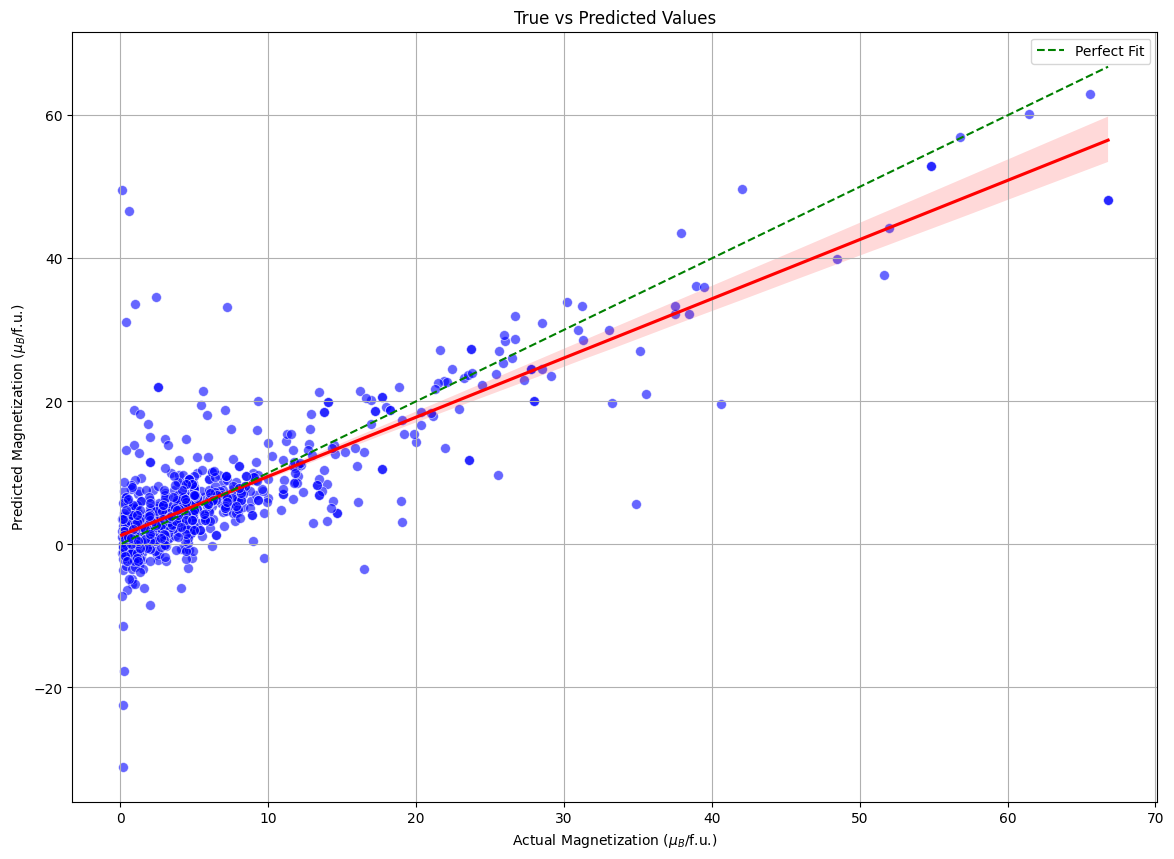

In [18]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x=y_test, y=y_pred_test, color='blue', alpha=0.6, s=50)
sns.regplot(x=y_test, y=y_pred_test, scatter=False, color='red')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         color='green', linestyle='--', label='Perfect Fit')

plt.xlabel('Actual Magnetization ($\mu_B$/f.u.)')
plt.ylabel('Predicted Magnetization ($\mu_B$/f.u.)')
plt.legend()
plt.title('True vs Predicted Values')
plt.grid(True)
plt.show()